##  Project 2, Part 2: Web Scraped Data Analysis and Visualizations

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/02/2024**

In [10]:
#importing packages
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing the URL of the Wikipedia page
response = r.get("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2021)")

# The Converts It Into Text
wiki_text =response.text

# This the html content
soup = BeautifulSoup(wiki_text, 'html.parser')

# This finds the table containg the film data, I had to inspect the code to find this
feature_films_heading = soup.find('span', {'id': 'Feature_films'})

# This finds and uses the parent element of the heading.
if feature_films_heading:
    parent_element = feature_films_heading.find_parent()
        
# This finds the first table within the parent element, since it's the one i'll be using
    required_table = parent_element.find_next_sibling('table', class_='wikitable sortable')

    # This looks for the headers of the rows since they start with th
    header_tags = required_table.find_all('th')
    headers = [header.text.strip() for header in header_tags]
    print(headers)  # This would print the headers of the rows

    # This extracts the data rows
    rows = []

    # This searches for all tr of the table
    data_rows = required_table.find_all('tr')

    # This displays the extracted rows from the site
    for row in data_rows[1:]:
        value = row.find_all('td')
        beautified_value = [dp.text.strip() for dp in value]
        print(beautified_value)

    # This finds other tables affiliated with the "Feature films" section
    other_tables = []
    sibling = required_table.find_next_sibling()
    while sibling and sibling.name == 'table':
        other_tables.append(sibling)
        sibling = sibling.find_next_sibling()

    # This prints the content of the other tables (for demonstration purposes)
    for other_table in other_tables:
        header_tags = other_table.find_all('th')
        headers = [header.text.strip() for header in header_tags]
        print(headers)  # This would print the headers of the rows

        # This extracts the data rows
        rows = []

        # This searches for all tr of the table
        data_rows = other_table.find_all('tr')

        # This displays the extracted rows from the site
        for row in data_rows[1:]:
            value = row.find_all('td')
            beautified_value = [dp.text.strip() for dp in value]
            print(beautified_value)
else:
    print("Feature films section not found.") #This was included just because I KEEP RUNNING INTO AN ISSUE WHERE I COULDN'T GRAB THE CODE FRON THE SITE ITSELF.

['Title', 'Genre', 'Premiere', 'Runtime', 'Language']
['What Happened to Mr. Cha?', 'Comedy', 'January 1, 2021', '1 h 42 min', 'Korean']
['Pieces of a Woman', 'Drama', 'January 7, 2021', '2 h 6 min', 'English']
['Stuck Apart', 'Drama', 'January 8, 2021', '1 h 36 min', 'Turkish']
['The Heartbreak Club', 'Comedy drama', 'January 14, 2021', '1 h 41 min', 'Indonesian']
['Double Dad', 'Comedy drama', 'January 15, 2021', '1 h 45 min', 'Portuguese']
['Outside the Wire', 'Action / science fiction', 'January 15, 2021', '1 h 55 min', 'English']
['Tribhanga – Tedhi Medhi Crazy', 'Drama', 'January 15, 2021', '1 h 35 min', 'Hindi']
['The White Tiger', 'Drama', 'January 22, 2021', '2 h 5 min', 'English']
['June & Kopi', 'Drama', 'January 28, 2021', '1 h 30 min', 'Indonesian']
['Finding ʻOhana', 'Family', 'January 29, 2021', '2 h 3 min', 'English']
['The Dig', 'Drama', 'January 29, 2021', '1 h 52 min', 'English']
['Below Zero', 'Drama', 'January 29, 2021', '1 h 46 min', 'Spanish']
['The Last Paradiso

In [11]:
data = [
    ['What Happened to Mr. Cha?', 'Comedy', 'January 1, 2021', '1 h 42 min', 'Korean'],
    ['Pieces of a Woman', 'Drama', 'January 7, 2021', '2 h 6 min', 'English'],
    ['Stuck Apart', 'Drama', 'January 8, 2021', '1 h 36 min', 'Turkish'],
    ['The Heartbreak Club', 'Comedy drama', 'January 14, 2021', '1 h 41 min', 'Indonesian'],
    ['Double Dad', 'Comedy drama', 'January 15, 2021', '1 h 45 min', 'Portuguese'],
    ['Outside the Wire', 'Action / science fiction', 'January 15, 2021', '1 h 55 min', 'English'],
    ['Tribhanga – Tedhi Medhi Crazy', 'Drama', 'January 15, 2021', '1 h 35 min', 'Hindi'],
    ['The White Tiger', 'Drama', 'January 22, 2021', '2 h 5 min', 'English'],
    ['June & Kopi', 'Drama', 'January 28, 2021', '1 h 30 min', 'Indonesian'],
    ['Finding ʻOhana', 'Family', 'January 29, 2021', '2 h 3 min', 'English'],
    ['The Dig', 'Drama', 'January 29, 2021', '1 h 52 min', 'English'],
    ['Below Zero', 'Drama', 'January 29, 2021', '1 h 46 min', 'Spanish'],
    ['The Last Paradiso', 'Romantic drama', 'February 5, 2021', '1 h 47 min', 'Italian'],
    ['Malcolm & Marie', 'Romantic drama', 'February 5, 2021', '1 h 46 min', 'English'],
    ['Space Sweepers', 'Science fiction', 'February 5, 2021', '2 h 16 min', 'Korean'],
    ['The Misadventures of Hedi and Cokeman', 'Comedy', 'February 10, 2021', '1 h 39 min', 'French'],
    ['Red Dot', 'Thriller', 'February 11, 2021', '1 h 26 min', 'Swedish'],
    ['Squared Love', 'Romantic comedy', 'February 11, 2021', '1 h 42 min', 'Polish'],
    ['To All the Boys: Always and Forever', 'Romantic comedy', 'February 12, 2021', '1 h 55 min', 'English'],
    ['Geez & Ann', 'Romantic drama', 'February 25, 2021', '1 h 45 min', 'Indonesian'],
    ['Crazy About Her', 'Romantic comedy', 'February 26, 2021', '1 h 42 min', 'Spanish'],
    ['The Girl on the Train', 'Thriller', 'February 26, 2021', '2 h', 'Hindi'],
    ['Moxie', 'Drama', 'March 3, 2021', '1 h 51 min', 'English'],
    ['Sentinelle', 'Action', 'March 5, 2021', '1 h 20 min', 'French'],
    ['Yes Day', 'Comedy', 'March 12, 2021', '1 h 29 min', 'English'],
    ['Paper Lives', 'Drama', 'March 12, 2021', '1 h 37 min', 'Turkish'],
    ['Get the Goat', 'Comedy', 'March 18, 2021', '1 h 38 min', 'Portuguese'],
    ['Caught by a Wave', 'Romantic teen drama', 'March 25, 2021', '1 h 39 min', 'Italian'],
    ['A Week Away', 'Christian musical', 'March 26, 2021', '1 h 37 min', 'English'],
    ['Bad Trip', 'Hidden-camera prank comedy', 'March 26, 2021', '1 h 26 min', 'English'],
    ['Pagglait', 'Comedy drama', 'March 26, 2021', '1 h 54 min', 'Hindi'],
    ['Tersanjung the Movie', 'Drama', 'April 1, 2021', '1 h 54 min', 'Indonesian'],
    ['Concrete Cowboy', 'Drama', 'April 2, 2021', '1 h 51 min', 'English'],
    ['Just Say Yes', 'Romantic comedy', 'April 2, 2021', '1 h 37 min', 'Dutch'],
    ['Madame Claude', 'Drama', 'April 2, 2021', '1 h 52 min', 'French'],
    ['Have You Ever Seen Fireflies?', 'Comedy', 'April 9, 2021', '1 h 54 min', 'Turkish'],
    ['Night in Paradise', 'Drama', 'April 9, 2021', '2 h 12 min', 'Korean'],
    ['Thunder Force', 'Superhero comedy', 'April 9, 2021', '1 h 47 min', 'English'],
    ['Prime Time', 'Thriller', 'April 14, 2021', '1 h 32 min', 'Polish'],
    ['Ride or Die', 'Psychological thriller drama', 'April 15, 2021', '2 h 22 min', 'Japanese'],
    ['Ajeeb Daastaans', 'Drama', 'April 16, 2021', '2 h 22 min', 'Hindi'],
    ['Arlo the Alligator Boy', 'Animated musical comedy', 'April 16, 2021', '1 h 32 min', 'English'],
    ['Get the Grift', 'Comedy', 'April 28, 2021', '1 h 35 min', 'Portuguese'],
    ['Things Heard & Seen', 'Horror', 'April 29, 2021', '2 h 1 min', 'English'],
    ['The Disciple', 'Drama', 'April 30, 2021', '2 h 8 min', 'Marathi'],
    ['Milestone', 'Drama', 'May 7, 2021', '1 h 37 min', 'Hindi'],
    ['Monster', 'Drama', 'May 7, 2021', '1 h 39 min', 'English'],
    ['Oxygen', 'Science fiction thriller', 'May 12, 2021', '1 h 41 min', 'French'],
    ['Ferry', 'Crime drama', 'May 14, 2021', '1 h 47 min', 'Dutch'],
    ['I Am All Girls', 'Thriller', 'May 14, 2021', '1 h 47 min', 'English'],
    ['The Woman in the Window', 'Psychological thriller', 'May 14, 2021', '1 h 41 min', 'English'],
    ['Sardar Ka Grandson', 'Comedy', 'May 18, 2021', '2 h 19 min', 'Hindi'],
    ['Army of the Dead', 'Zombie/heist', 'May 21, 2021', '2 h 28 min', 'English'],
    ['Baggio: The Divine Ponytail', 'Biopic', 'May 26, 2021', '1 h 32 min', 'Italian'],
    ['Ghost Lab', 'Horror', 'May 26, 2021', '1 h 57 min', 'Thai'],
    ['Blue Miracle', 'Drama', 'May 27, 2021', '1 h 36 min', 'English'],
    ['Carnaval', 'Comedy', 'June 2, 2021', '1 h 35 min', 'Portuguese'],
    ['Dancing Queens', 'Drama', 'June 3, 2021', '1 h 51 min', 'Swedish'],
    ['Sweet & Sour', 'Romantic drama', 'June 4, 2021', '1 h 42 min', 'Korean'],
    ["Trippin' with the Kandasamys", 'Comedy', 'June 4, 2021', '1 h 33 min', 'English'],
    ['Xtreme', 'Action', 'June 4, 2021', '1 h 52 min', 'Spanish'],
    ['Awake', 'Science fiction thriller', 'June 9, 2021', '1 h 37 min', 'English'],
    ['Tragic Jungle', 'Drama', 'June 9, 2021', '1 h 36 min', 'Spanish'],
    ['Skater Girl', 'Coming-of-age sports drama', 'June 11, 2021', '1 h 49 min', 'Hindi'],
    ['Ali & Ratu Ratu Queens', 'Comedy drama', 'June 17, 2021', '1 h 40 min', 'Indonesian'],
    ['Jagame Thandhiram', 'Action thriller', 'June 18, 2021', '2 h 38 min', 'Tamil'],
    ['Good on Paper', 'Comedy', 'June 23, 2021', '1 h 34 min', 'English'],
    ['America: The Motion Picture', 'Animation / comedy / historical fiction', 'June 30, 2021', '1 h 38 min', 'English'],
    ['Fear Street Part 1: 1994', 'Teen horror / slasher', 'July 2, 2021', '1 h 47 min', 'English'],
    ['The 8th Night', 'Thriller film', 'July 2, 2021', '1 h 55 min', 'Korean'],
    ['Haseen Dillruba', 'Romantic thriller', 'July 2, 2021', '2 h 15 min', 'Hindi'],
    ['Fear Street Part 2: 1978', 'Teen horror / slasher', 'July 9, 2021', '1 h 50 min', 'English'],
    ['Last Summer', 'Romantic drama', 'July 9, 2021', '1 h 41 min', 'Turkish'],
    ['A Classic Horror Story', 'Horror', 'July 14, 2021', '1 h 35 min', 'Italian'],
    ['A Perfect Fit', 'Romantic comedy / drama', 'July 15, 2021', '1 h 52 min', 'Indonesian'],
    ['My Amanda', 'Romance', 'July 15, 2021', '1 h 29 min', 'Filipino'],
    ['Deep', 'Science fiction', 'July 16, 2021', '1 h 41 min', 'Thai'],
    ['Fear Street Part 3: 1666', 'Supernatural horror', 'July 16, 2021', '1 h 54 min', 'English'],
    ['Trollhunters: Rise of the Titans', 'Animated fantasy', 'July 21, 2021', '1 h 46 min', 'English'],
    ['Blood Red Sky', 'Thriller', 'July 23, 2021', '2 h 3 min', 'German'],
    ['Bankrolled', 'Comedy', 'July 23, 2021', '1 h 37 min', 'Spanish'],
    ['Bartkowiak', 'Action', 'July 28, 2021', '1 h 31 min', 'Polish'],
    ['Resort to Love', 'Romantic comedy', 'July 29, 2021', '1 h 41 min', 'English'],
    ['The Last Mercenary', 'Action comedy', 'July 30, 2021', '1 h 52 min', 'French'],
    ['The Kissing Booth 3', 'Comedy drama', 'August 11, 2021', '1 h 53 min', 'English'],
    ['Beckett', 'Action thriller', 'August 13, 2021', '1 h 50 min', 'English'],
    ['Black Island', 'Thriller', 'August 18, 2021', '1 h 44 min', 'German'],
    ['The Secret Diary of an Exchange Student', 'Romantic comedy', 'August 18, 2021', '1 h 36 min', 'Portuguese'],
    ['Sweet Girl', 'Action', 'August 20, 2021', '1 h 50 min', 'English'],
    ['The Loud House Movie', 'Animation/comedy', 'August 20, 2021', '1 h 27 min', 'English'],
    ['The Witcher: Nightmare of the Wolf', 'Animated dark fantasy', 'August 23, 2021', '1 h 23 min', 'English'],
    ["He's All That", 'Teen romantic comedy', 'August 27, 2021', '1 h 31 min', 'English'],
    ['Afterlife of the Party', 'Comedy', 'September 2, 2021', '1 h 49 min', 'English'],
    ['JJ+E', 'Romance', 'September 8, 2021', '1 h 31 min', 'Swedish'],
    ['Kate', 'Action thriller', 'September 10, 2021', '1 h 46 min', 'English'],
    ['Prey', 'Thriller', 'September 10, 2021', '1 h 27 min', 'German'],
    ['Nightbooks', 'Fantasy/horror', 'September 15, 2021', '1 h 40 min', 'English'],
    ['Ankahi Kahaniya', 'Anthology film', 'September 17, 2021', '1 h 50 min', 'Hindi'],
    ['Confessions of an Invisible Girl', 'Drama', 'September 22, 2021', '1 h 31 min', 'Portuguese'],
    ['Intrusion', 'Thriller', 'September 22, 2021', '1 h 33 min', 'English'],
    ['The Starling', 'Comedy drama', 'September 24, 2021', '1 h 44 min', 'English'],
    ['Friendzone', 'Romantic comedy', 'September 29, 2021', '1 h 28 min', 'French'],
    ['No One Gets Out Alive', 'Horror', 'September 29, 2021', '1 h 25 min', 'English'],
    ['Sounds Like Love', 'Romantic comedy', 'September 29, 2021', '1 h 50 min', 'Spanish'],
    ['Diana: The Musical', 'Musical', 'October 1, 2021', '1 h 57 min', 'English'],
    ['Forever Rich', 'Thriller', 'October 1, 2021', '1 h 30 min', 'Dutch'],
    ['Swallow', 'Drama', 'October 1, 2021', '2 h 8 min', 'English'],
    ['The Guilty', 'Thriller', 'October 1, 2021', '1 h 31 min', 'English'],
    ["There's Someone Inside Your House", 'Slasher', 'October 6, 2021', '1 h 36 min', 'English'],
    ['Grudge', 'Thriller', 'October 8, 2021', '1 h 46 min', 'Turkish'],
    ['My Brother, My Sister', 'Drama', 'October 8, 2021', '1 h 50 min', 'Italian'],
    ['Bright: Samurai Soul', 'Anime/fantasy', 'October 12, 2021', '1 h 20 min', 'Japanese'],
    ['Fever Dream', 'Drama', 'October 13, 2021', '1 h 33 min', 'Spanish'],
    ['Operation Hyacinth', 'Drama', 'October 13, 2021', '1 h 52 min', 'Polish'],
    ['A World Without', 'Science fiction / teen drama', 'October 14, 2021', '1 h 47 min', 'Indonesian'],
    ['The Four of Us', 'Comedy', 'October 15, 2021', '1 h 28 min', 'German'],
    ['Night Teeth', 'Thriller', 'October 20, 2021', '1 h 48 min', 'English'],
    ['Stuck Together', 'Comedy', 'October 20, 2021', '2 h 6 min', 'French'],
    ['Little Big Mouth', 'Romantic comedy', 'October 22, 2021', '1 h 34 min', 'English'],
    ['Hypnotic', 'Thriller', 'October 27, 2021', '1 h 29 min', 'English'],
    ['Nobody Sleeps in the Woods Tonight Part 2', 'Horror', 'October 27, 2021', '1 h 37 min', 'Polish'],
    ['Army of Thieves', 'Romantic comedy / heist', 'October 29, 2021', '2 h 9 min', 'English'],
    ['The Harder They Fall', 'Western', 'November 3, 2021', '2 h 19 min', 'English'],
    ['Love Hard', 'Romantic comedy', 'November 5, 2021', '1 h 46 min', 'English'],
    ['Meenakshi Sundareshwar', 'Romantic comedy', 'November 5, 2021', '2 h 21 min', 'Hindi'],
    ["We Couldn't Become Adults", 'Drama', 'November 5, 2021', '2 h 4 min', 'Japanese'],
    ['Yara', 'Drama', 'November 5, 2021', '1 h 36 min', 'Italian'],
    ['Father Christmas Is Back', 'Comedy', 'November 7, 2021', '1 h 45 min', 'English'],
    ['Happiness Ever After', 'Romantic drama', 'November 10, 2021', '1 h 39 min', 'English'],
    ['Passing', 'Drama', 'November 10, 2021', '1 h 39 min', 'English'],
    ['7 Prisoners', 'Drama', 'November 11, 2021', '1 h 34 min', 'Portuguese'],
    ['Red Notice', 'Action comedy', 'November 12, 2021', '1 h 57 min', 'English'],
    ['Just Short of Perfect', 'Romantic comedy', 'November 18, 2021', '1 h 34 min', 'Portuguese'],
    ['The Princess Switch 3: Romancing the Star', 'Romantic comedy', 'November 18, 2021', '1 h 46 min', 'English'],
    ['Dhamaka', 'Action thriller', 'November 19, 2021', '1 h 44 min', 'Hindi'],
    ['Love Me Instead', 'Drama', 'November 19, 2021', '2 h 4 min', 'Turkish'],
    ['Tick, Tick... Boom!', 'Musical', 'November 19, 2021', '1 h 55 min', 'English'],
    ['Bruised', 'Drama', 'November 24, 2021', '2 h 12 min', 'English'],
    ['A Castle for Christmas', 'Romantic comedy', 'November 26, 2021', '1 h 39 min', 'English'],
    ['The Power of the Dog', 'Drama', 'December 1, 2021', '2 h 8 min', 'English'],
    ['Single All the Way', 'Holiday romantic comedy', 'December 2, 2021', '1 h 41 min', 'English'],
    ['The Whole Truth', 'Horror', 'December 2, 2021', '2 h 5 min', 'Thai'],
    ['Mixtape', 'Coming-of-age comedy-drama', 'December 3, 2021', '1 h 37 min', 'English'],
    ['David and the Elves', 'Fantasy', 'December 6, 2021', '1 h 46 min', 'Polish'],
    ['The Claus Family 2', 'Fantasy', 'December 7, 2021', '1 h 37 min', 'Dutch'],
    ['Asakusa Kid', 'Drama', 'December 9, 2021', '2 h 3 min', 'Japanese'],
    ['Anonymously Yours', 'Romantic comedy', 'December 10, 2021', '1 h 41 min', 'Spanish'],
    ['Back to the Outback', 'Animation', 'December 10, 2021', '1 h 35 min', 'English'],
    ['The Unforgivable', 'Drama', 'December 10, 2021', '1 h 54 min', 'English'],
    ['The Hand of God', 'Drama', 'December 15, 2021', '2 h 10 min', 'Italian'],
    ['A California Christmas: City Lights', 'Romantic comedy', 'December 16, 2021', '1 h 30 min', 'English'],
    ['A Naija Christmas', 'Romantic comedy', 'December 16, 2021', '2 h 1 min', 'English'],
    ['Grumpy Christmas', 'Comedy', 'December 21, 2021', '1 h 27 min', 'Spanish'],
    ['1000 Miles from Christmas', 'Christmas film', 'December 24, 2021', '1 h 42 min', 'Spanish'],
    ["Don't Look Up", 'Science fiction comedy', 'December 24, 2021', '2 h 18 min', 'English'],
    ['Minnal Murali', 'Superhero', 'December 24, 2021', '2 h 39 min', 'Malayalam'],
    ['Lulli', 'Comedy', 'December 26, 2021', '1 h 30 min', 'Portuguese'],
    ['Hilda and the Mountain King', 'Animation/fantasy', 'December 30, 2021', '1 h 24 min', 'English'],
] # I've decided to just grab and add the data that i gathered here as it was taking me hours to just try to get it within the file itself.
# The way that it was organized in the website itself was wrong-off so I had to work with the limitations in mind just to create this.

# This converts the data into a dataframe
df = pd.DataFrame(data, columns=['Title', 'Genre', 'Premiere', 'Runtime', 'Language'])

# This extracts month from the 'premiere' column and creates a new column 'month'
df['Month'] = df['Premiere'].apply(lambda x: x.split(' ')[0])

# This cleans the 'runtime' column and converts it to numeric values
df['Runtime (min)'] = df['Runtime'].apply(lambda x: int(x.split(' ')[0]) if x != 'TBA' else None)

# This converts the 'premiere' column into datetime format
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

The question I'm going to answer using the gathered data is "What are the most common genres for Netflix films?" I'll be making this into a top 10 list to simplify it, overall this should be an interesting discovery.

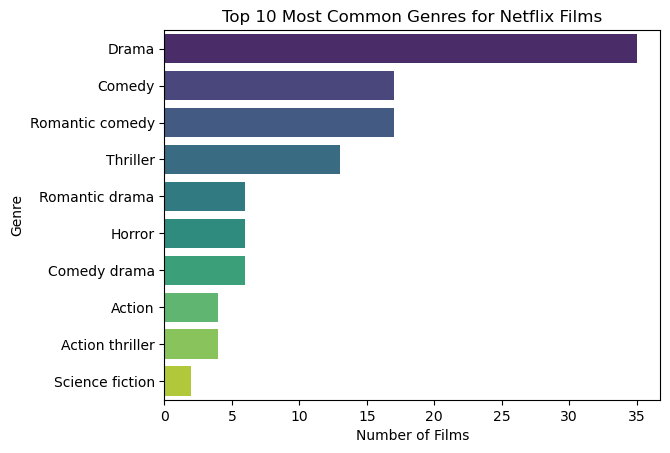

In [12]:
# What are the most common genres for Netflix films?
top_genres = df["Genre"].value_counts().head(10)#organzies theme by Genre
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis") #This uses a different palette color using sns
plt.xlabel("Number of Films") 
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres for Netflix Films")
plt.show()


It appears that Drama films were the most common genres for Netflix films during 2021, while Comedy, Romance comedy, Thriller, etc. are on the lower end as they don't seemingly have the same quanity as Drama films during 2021.

Here I'm answering the question, "What are the most common genres for Netflix films?" I'll be using a graph to display the top 5 most common language for Netflix films


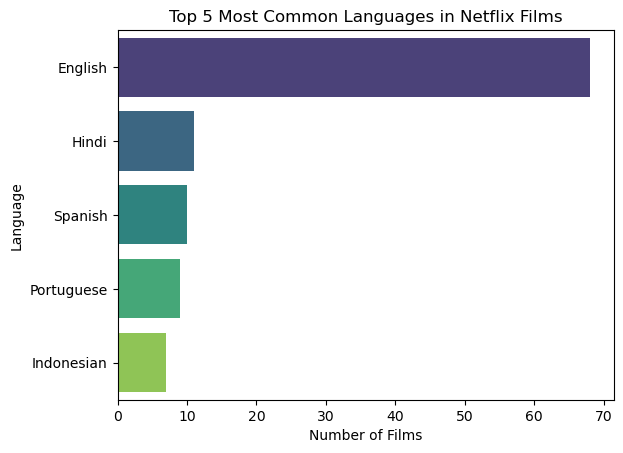

In [13]:
# What are the top 5 languages most commonly used in Netflix films?
top_languages = df["Language"].value_counts().head(5) #This grabs the lanuages and makes it to be the top 5 that are diaplayed
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis") #use sns to change the color of the graph to be more appealing
plt.xlabel("Number of Films") #This gathers the overall amount of films
plt.ylabel("Language") 
plt.title("Top 5 Most Common Languages in Netflix Films")
plt.show()

It appears that the most common language is English for Netflix films, followed by Hindi, Spanish, Potugese, and Indonesian, even during 2021 it appears that the majority of films were in English, while every other language wasn't as prominent. It is interesting to note that there is a huge different between the language of Netflix films during 2021 to 2022 and so on.

The question I'm going to be answering here is "How has the number of Netflix films released each month changed over time?
" This should help us deteremine if the number of films increases or decrease for Netflix as of 2021.

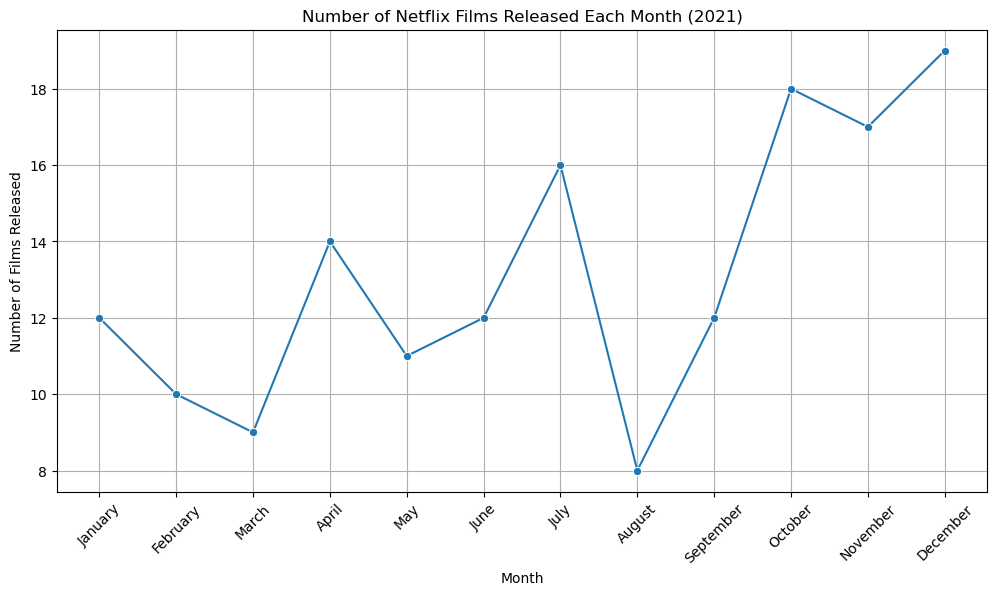

In [18]:
# I'm defining the order of the months here since I ran into an issue in which it was all scrambled 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# This helps to convert the 'Month' column to categorical with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# How has the number of Netflix films released each month changed over time?
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.title('Number of Netflix Films Released Each Month (2021)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It appears that the month with the most films released during December, January only started off with 12 films while it kept decreasing until it April, April they released 14 films but it then went back down until July where they released 16 films again. During August it reached it's lowest point in film releases at 8 films, it gradually went back up during September with 12 films, October with 18 films, November with 17 films and reached it's peak with 19 films in December.

The question being answered here is "What are the top 5 Netflix films with the longest runtime?" I'll be using the runtime for the films to determine the answer for this one.

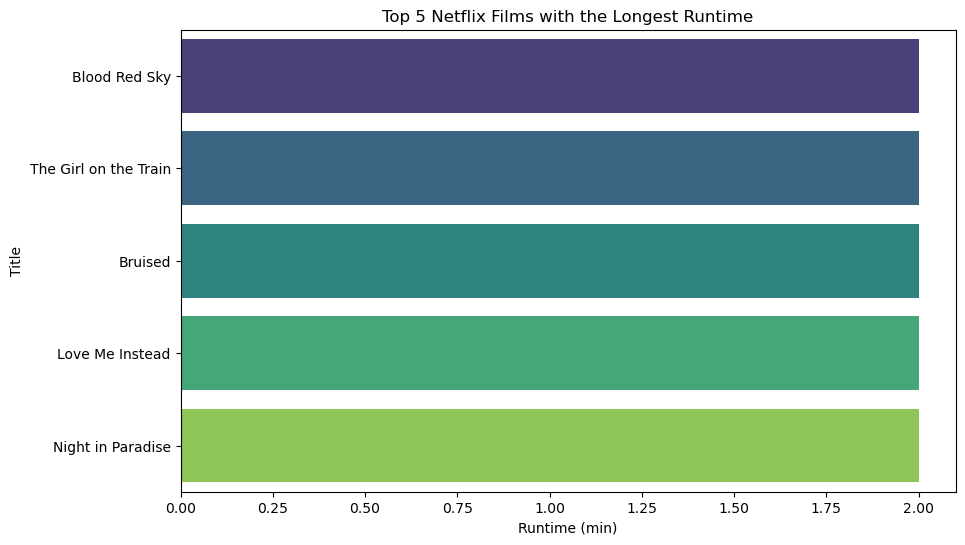

Top 5 Netflix films with the longest runtime:
                     Title     Runtime
79           Blood Red Sky   2 h 3 min
21   The Girl on the Train         2 h
137                Bruised  2 h 12 min
135        Love Me Instead   2 h 4 min
36       Night in Paradise  2 h 12 min


In [15]:
#What are the top 5 Netflix films with the longest runtime?
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)

#I create a simple graph which only displays the top 5 longest running films to appear on, it doesn't exactly display the actual amount since i'd probably would need to do more just to make it work,
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime (min)', y='Title', data=top_longest_films, palette='viridis', order=top_longest_films['Title'])
plt.xlabel('Runtime (min)')
plt.ylabel('Title')
plt.title('Top 5 Netflix Films with the Longest Runtime')
plt.show()

# This only prints/displays the length of each of the films, this was on the simplier side to create.
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)
print("Top 5 Netflix films with the longest runtime:")
print(top_longest_films[['Title', 'Runtime']])

It appears that Night in Paradise and Bruised were the longest running film as of 2021 on Netflix, followed by Love Me Instead, Blood Red Sky, and The Girl on the Train. It's interesting to note that both of the longest films during 2021 had the exact same length as each other.

This was just a random additonal one I included just for testing out a differnt type of plotting, this is not part of the 4 main questions i went out to answer, the question being asnwer is "Does Lnauage and genre have anything to do with the films?"

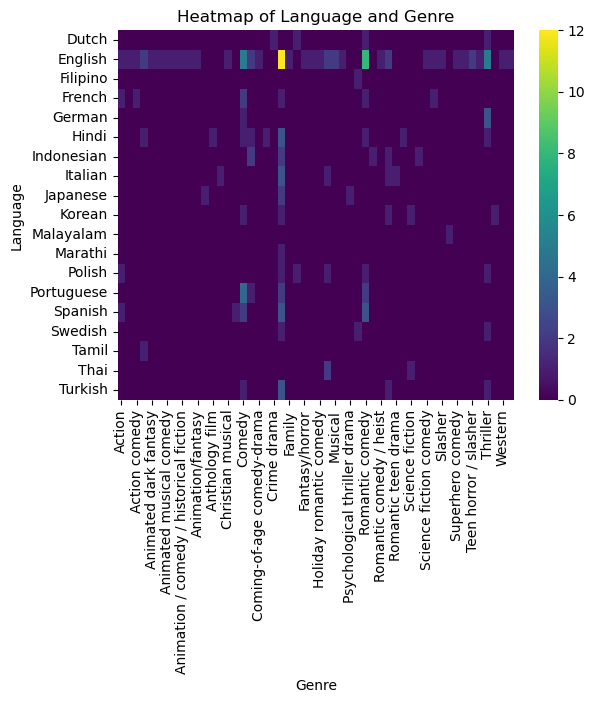

In [19]:
# Does language and genre have anything to do with films?
language_genre_cross = df.groupby(["Language", "Genre"]).size().unstack(fill_value=0)
sns.heatmap(language_genre_cross, cmap="viridis")
plt.xlabel("Genre")
plt.ylabel("Language")
plt.title("Heatmap of Language and Genre")
plt.show()

It does appear that English and Crime Drama films were populary during 2021, this does line up with the tread during the time as I recall that most people were seemingly interested in Crime Drama's during the time. It's pretty interesting seeing that reflected with Netflix films during 2021.